<a href="https://colab.research.google.com/github/magemongo/chatbot-using-predictive-analysis-with-wml-heart-failure/blob/master/teste_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dados importados, bibliotecas de plot e dataframe.**


**Premissas iniciais:**

Através do uso um modelo não supervisionado, como no caso de uma clusterização, encontrar nos municípios do Estado de São Paulo grupos similares baseando-se na comparação de métricas de saúde.

**Variaveis iniciais:** (info adicional sobre os indicadores no diário de projeto)

*   1 - Mortalidade_infantil
*   2 - IDHM_Educacao
*   3 - Densidade_demográfica
*   4 - Renda_per_capita
*   5 - Grau_de_Urbanizacao
*   6 - Indice_de_Gini
*   7 - Esgoto_Sanitario
*   8 - Qtd_Estabelecimentos
*   9 - Total_Medicos
*   10 - Total_Doses_Aplicadas




Importamos as bibliotecas:
- Pandas para leitura e manipulação do Dataframe
- Matplotlib e Seaborn para a plotagem de gráficos
- Numpy para operações matemáticas

Em seguida usamos a função do pandas .read_csv para carregar nossa base de dados:


In [33]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np  

df_raw = pd.read_csv('https://raw.githubusercontent.com/EduardoMoraesRitter/CA_MU_DS_VINCE/master/dado_municipios.csv', encoding='UTF-8', error_bad_lines=False, sep=';') 
df_raw

,Cod_IBGE,Cod_CNES,Municipio,Indice_de_Gini,Populacao,Criancas,Jovens,Adultos,Idosos,Populacao_Masculina,Populacao_Feminina,Grau_de_Urbanizacao,Abastecimento_de_Agua,Coleta_de_Lixo,Esgoto_Sanitario,Total_Doses_Aplicadas,Qtd_Estabelecimentos,Total_Equip_existente,Total_Equip_em uso,Total_Medicos,Densidade_demográfica,Mortalidade_infantil,Renda_per_capita,IDHM,IDHM_Longevidade,IDHM_Educacao,IDHM_Renda,IDHM_Ranking,Indice_Futuridade
0,3500105,350010,Adamantina,0.515,33894,5218,4059,17219,7398,16326,17568,96.38,99.76,99.89,99.03,13419,140,336,284,145.0,85.12,11.63,778.44,0.790,0.852,0.750,0.772,35,66.5
1,3500204,350020,Adolfo,0.411,3447,525,458,1703,761,1707,1740,92.52,96.76,99.72,95.93,3263,5,32,31,5.0,16.88,19.23,588.02,0.730,0.844,0.648,0.710,388,60.1
2,3500303,350030,Aguaí,0.480,35608,7075,5215,18073,5245,17889,17719,92.21,99.29,99.66,98.87,16257,64,68,66,65.0,76.50,16.06,540.88,0.715,0.858,0.606,0.703,502,27.0
3,3500402,350040,Águas da Prata,0.531,7797,1174,994,3900,1729,3830,3967,92.19,95.84,99.38,87.99,3050,4,25,25,18.0,57.33,25.32,726.28,0.781,0.886,0.716,0.750,62,57.2
4,3500501,350050,Águas de Lindóia,0.461,18374,3506,2450,9143,3275,8944,9430,99.10,93.54,98.74,90.33,8196,41,174,161,46.0,311.10,8.37,680.22,0.745,0.846,0.675,0.725,265,66.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,3557006,355700,Votorantim,0.410,119824,23682,18194,61570,16378,59303,60521,96.19,98.38,99.80,95.94,57667,103,683,662,68.0,667.40,13.64,643.20,0.767,0.838,0.747,0.720,127,35.5
641,3557105,355710,Votuporanga,0.499,91760,14260,11418,48879,17203,44664,47096,97.20,99.50,99.79,98.95,59395,224,1338,1267,279.0,224.74,8.61,808.00,0.790,0.857,0.744,0.772,35,50.0
642,3557154,355715,Zacarias,0.392,2560,414,351,1314,481,1271,1289,85.27,99.06,100.00,97.02,1089,3,41,36,NaN,8.52,32.26,523.97,0.729,0.826,0.674,0.695,400,60.0
643,3557204,355720,Chavantes,0.481,12223,2507,1803,5815,2098,6055,6168,94.29,100.00,99.91,98.00,5682,20,96,89,6.0,65.80,5.29,586.48,0.729,0.828,0.655,0.713,400,50.9


In [34]:
'''a = df_raw[['Coleta_de_Lixo','Abastecimento_de_Agua','Esgoto_Sanitario']]
df_raw['infra_media'] = (a['Coleta_de_Lixo'] + a['Abastecimento_de_Agua'] + a['Esgoto_Sanitario'])/3'''
# possivel união dos indicadores Coleta de Lixo, Abastecimento de Agua e Esgoto Sanitário em uma coluna unificada

"a = df_raw[['Coleta_de_Lixo','Abastecimento_de_Agua','Esgoto_Sanitario']]\ndf_raw['infra_media'] = (a['Coleta_de_Lixo'] + a['Abastecimento_de_Agua'] + a['Esgoto_Sanitario'])/3"

Foram selecionados da base de dados original apenas os 10 indicadores que achamos mais relevantes para nossa análise, e então adicionamos os mesmos a um dataset separado chamado df_saude.

In [35]:
columns = ['Cod_IBGE','Mortalidade_infantil','IDHM_Educacao','Densidade_demográfica','Renda_per_capita','Grau_de_Urbanizacao','Indice_de_Gini','Esgoto_Sanitario','Qtd_Estabelecimentos','Total_Medicos','Total_Doses_Aplicadas']

df_saude = df_raw[columns]

#df_saude.set_index('Cod_IBGE', inplace= True)
df_saude.head()

,Cod_IBGE,Mortalidade_infantil,IDHM_Educacao,Densidade_demográfica,Renda_per_capita,Grau_de_Urbanizacao,Indice_de_Gini,Esgoto_Sanitario,Qtd_Estabelecimentos,Total_Medicos,Total_Doses_Aplicadas
0,3500105,11.63,0.750,85.12,778.44,96.38,0.515,99.03,140,145.0,13419
1,3500204,19.23,0.648,16.88,588.02,92.52,0.411,95.93,5,5.0,3263
2,3500303,16.06,0.606,76.50,540.88,92.21,0.480,98.87,64,65.0,16257
3,3500402,25.32,0.716,57.33,726.28,92.19,0.531,87.99,4,18.0,3050
4,3500501,8.37,0.675,311.10,680.22,99.10,0.461,90.33,41,46.0,8196



# **Limpeza e Normalização dos dados**.


Nessa etapa verificamos a existencia de valores nulos em nosso dataset, e então damos o tratamento adequado a cada caso.
Também faremos aqui a normalização de dados absolutos, de forma que sejam sempre valores relativos, e portanto, menos enviesados.

Vemos por exemplo que em nosso dataset existem 28 valores nulos na coluna Total_Medicos.

In [36]:
df_saude.isnull().sum()

Cod_IBGE                  0
Mortalidade_infantil      0
IDHM_Educacao             0
Densidade_demográfica     0
Renda_per_capita          0
Grau_de_Urbanizacao       0
Indice_de_Gini            0
Esgoto_Sanitario          0
Qtd_Estabelecimentos      0
Total_Medicos            28
Total_Doses_Aplicadas     0
dtype: int64

Porém como seus valores são absolutos fica dificil a visualização do seu comportamento:

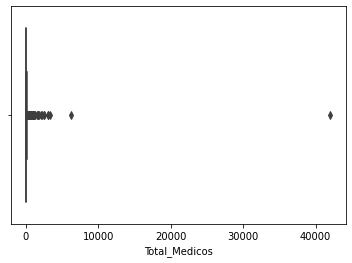

In [37]:
sns.boxplot(df_saude['Total_Medicos'])

Primeiro vamos transformal o número total em uma taxa por mil habitantes utilizando uma função simples. Gerando assim uma nova coluna chamada Razao_Medico_mil_Hab.

Observamos agora em um boxplot como é a distribuição de nossos dados.
É possível observar que em nosso dados existe um número expressivo de valores extremos, e como não queremos deixar valores vazios utilizaremos a mediana em vez da média, por ser uma medida central menos sensível a *outliers*.

In [38]:
df_saude['Razao_Medico_mil_Hab'] = (df_saude['Total_Medicos']*1000)/df_raw['Populacao'] #Transforma os dados absolutos para relativos.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


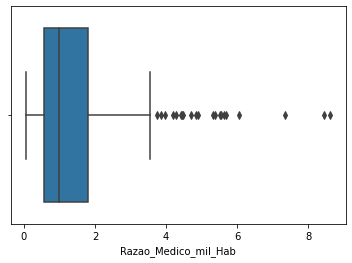

In [39]:
sns.boxplot(df_saude['Razao_Medico_mil_Hab'])

In [40]:
df_saude['Razao_Medico_mil_Hab'].replace(np.nan, df_saude['Razao_Medico_mil_Hab'].median(), inplace=True) #Sustitui os valores nulos pela mediana
df_saude.drop('Total_Medicos', axis=1, inplace=True) #Exclui a coluta Total_Medicos

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Veremos agora se resolvemos o problema dos dados nulos em nosso dataset:

In [41]:
df_saude.isnull().sum()

Cod_IBGE                 0
Mortalidade_infantil     0
IDHM_Educacao            0
Densidade_demográfica    0
Renda_per_capita         0
Grau_de_Urbanizacao      0
Indice_de_Gini           0
Esgoto_Sanitario         0
Qtd_Estabelecimentos     0
Total_Doses_Aplicadas    0
Razao_Medico_mil_Hab     0
dtype: int64

Outra parte da limpeza dos dados é verificar que cada variavel está registrada como o tipo adequado de dado, categórico, contínuo ou inteiro. Verificamos isso coma função .dtypes.

Vemos que Mortalidade_infantil está registrado como object (categórico), quando queremos que seja um float (contínuo). Descobrimos que isso acontece pela presença de strings  " - "  em algumas das linhas, então temos mais alguns dados nulos a serem tratatos:

In [42]:
df_saude.dtypes

Cod_IBGE                   int64
Mortalidade_infantil      object
IDHM_Educacao            float64
Densidade_demográfica    float64
Renda_per_capita         float64
Grau_de_Urbanizacao      float64
Indice_de_Gini           float64
Esgoto_Sanitario         float64
Qtd_Estabelecimentos       int64
Total_Doses_Aplicadas      int64
Razao_Medico_mil_Hab     float64
dtype: object

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


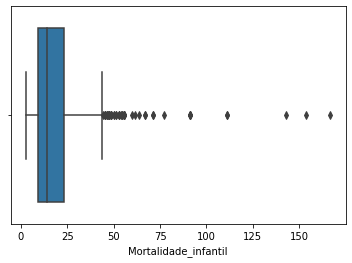

In [43]:
df_saude['Mortalidade_infantil'].replace('-', np.nan, inplace=True) #substitui as strings '-' por valores nulos.
df_saude['Mortalidade_infantil'] = df_saude['Mortalidade_infantil'].astype(float) #converte Mortalidade_infantil de object para float
sns.boxplot(df_saude['Mortalidade_infantil'])

In [44]:
df_saude['Mortalidade_infantil'].replace(np.nan, df_saude['Mortalidade_infantil'].median(), inplace=True) #usamos novamente a mediana ao inves da média pela presença de muitos outliers

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


Por fim vamos converter os ultimos dados absolutos em relativos, no caso Total_Doses_Aplicadas e Qtd_Esbalecimentos, fazendo uma taxa simples por mil habitantes transformamos seus valores e renomeamos as colunas para Doses_Aplicadas_mil_Hab e Estab_por_mil_Hab e vamos ver como esta nosso dataset:

In [45]:
columns = ['Qtd_Estabelecimentos','Total_Doses_Aplicadas']

for column in columns:
  df_saude[column] = (df_saude[column]*1000)/df_raw['Populacao']

df_saude.rename(columns={'Total_Doses_Aplicadas':'Doses_Aplicadas_mil_Hab', 'Qtd_Estabelecimentos':'Estab_por_mil_Hab'}, inplace=True)
df_saude.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Cod_IBGE,Mortalidade_infantil,IDHM_Educacao,Densidade_demográfica,Renda_per_capita,Grau_de_Urbanizacao,Indice_de_Gini,Esgoto_Sanitario,Estab_por_mil_Hab,Doses_Aplicadas_mil_Hab,Razao_Medico_mil_Hab
0,3500105,11.63,0.750,85.12,778.44,96.38,0.515,99.03,4.130525,395.910781,4.278043
1,3500204,19.23,0.648,16.88,588.02,92.52,0.411,95.93,1.450537,946.620249,1.450537
2,3500303,16.06,0.606,76.50,540.88,92.21,0.480,98.87,1.797349,456.554707,1.825432
3,3500402,25.32,0.716,57.33,726.28,92.19,0.531,87.99,0.513018,391.176093,2.308580
4,3500501,8.37,0.675,311.10,680.22,99.10,0.461,90.33,2.231414,446.065092,2.503538


# **Análises estatisticas dos dados, detecção e remoção de *outliers*, conclusões prévias e especulações.**



Agora nosso dataset está pronto para começarmos a fazer nossas primeiras suposições. Usando o seaborn, plotamos um mata de calor com a correlação de nossas variaveis, é do nosso melhor interesse que não existam correlações com valores maiores do que 0.80 em módulo, pois isso pode significar uma autocorrelação e prejudicar a qualidade do modelo que pretendemos utilizar:

In [0]:
df_saude.set_index('Cod_IBGE', inplace= True)

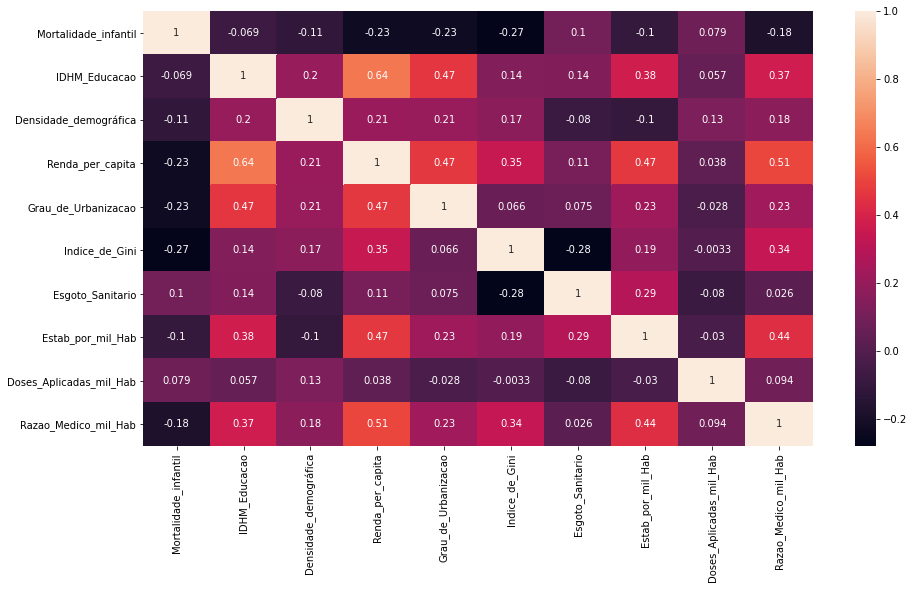

In [47]:
plt.figure(figsize=(15,8))
sns.heatmap(df_saude.corr(), annot=True)

Inicialmente optamos por usar o IDHM como uma de nossas variáveis, porém percebemos uma correlação maior que a recomendada com Renda_per_capita. Nossa suposição é a de que o IDHM, por ser um índice muito refinado que inclusive contém a renda de uma população em seu cálculo, estava criando distorções em nosso dataset. Partindo dessa premissa decidimos utilizar apenas o IDHM_Educacao, por se tratar de um um indicador mais acertivo dentro da nossa análise.

Porém ainda não podemos dizer muito sobre nossas dados. Utilizando boxplots, podemos ver a presença de muitos outliers que nos impedem de visualizar corretamente nossos dados.

Boxplot por variável:



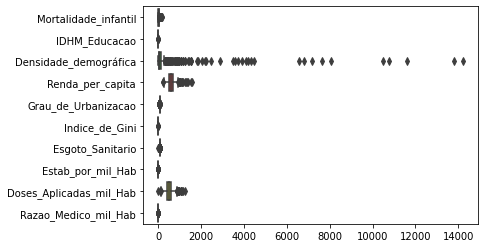

In [48]:
sns.boxplot(data=df_saude, orient='h')
print('Boxplot por variável:')
print()

Como não podemos excluir municípios de nossas análises, vamos separar os outliers em um novo dataset:

In [49]:
pos_3q = []
pre_1q = []

for column in df_saude: #definição das fences de outliers usando a regra da amplitude interquartil (IQR)*1.5
  temp_1 = (np.quantile(df_saude[column],0.25))
  temp_3 = (np.quantile(df_saude[column],0.75))
  print(column,':', temp_3)
  print('Se for < que',(temp_1 - 1.5*(temp_3 - temp_1)),'Ou se for > que', (temp_3 + 1.5*(temp_3 - temp_1)))
  pos_3q.append(temp_3 + 1.5*(temp_3 - temp_1))
  pre_1q.append(temp_1 - 1.5*(temp_3 - temp_1))

Mortalidade_infantil : 23.26
Se for < que -11.14 Ou se for > que 43.900000000000006
IDHM_Educacao : 0.7090000000000001
Se for < que 0.5465 Ou se for > que 0.8065000000000002
Densidade_demográfica : 125.71
Se for < que -133.83999999999997 Ou se for > que 281.44
Renda_per_capita : 674.87
Se for < que 253.42000000000004 Ou se for > que 927.74
Grau_de_Urbanizacao : 96.06
Se for < que 62.81000000000001 Ou se for > que 116.00999999999999
Indice_de_Gini : 0.495
Se for < que 0.3025 Ou se for > que 0.6105
Esgoto_Sanitario : 98.71
Se for < que 76.36 Ou se for > que 112.11999999999999
Estab_por_mil_Hab : 2.073111740722825
Se for < que -0.7884048441390191 Ou se for > que 3.7900216916399314
Doses_Aplicadas_mil_Hab : 583.587786259542
Se for < que 110.62389547036088 Ou se for > que 867.3661207330506
Razao_Medico_mil_Hab : 1.7425939756036843
Se for < que -1.137483947519387 Ou se for > que 3.4706407294775268


Vamos analisar algumas das distribuições filtrando os outliers superiores ao terceiro quartil.

- Renda_per_capita:

número de registros desconsiderando os filtrados: 627


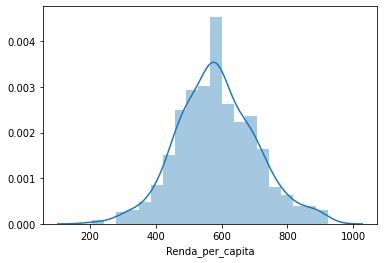

In [50]:
filter = df_saude['Renda_per_capita'] < 927.74
sns.distplot(df_saude[filter]['Renda_per_capita'])

print('número de registros desconsiderando os filtrados:',df_saude[filter]['Renda_per_capita'].shape[0])

novo boxplot desconsiderando dados filtrados:


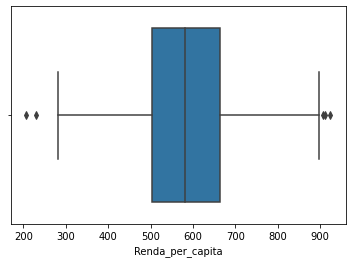

In [51]:
sns.boxplot(df_saude[filter]['Renda_per_capita'])

print('novo boxplot desconsiderando dados filtrados:')

- Doses_Aplicadas_mil_Hab:

número de registros desconsiderando os filtrados: 622


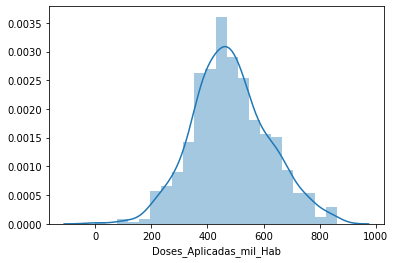

In [52]:
filter = df_saude['Doses_Aplicadas_mil_Hab'] < 867.3661207330506
sns.distplot(df_saude[filter]['Doses_Aplicadas_mil_Hab'])

print('número de registros desconsiderando os filtrados:',df_saude[filter]['Doses_Aplicadas_mil_Hab'].shape[0])

novo boxplot desconsiderando dados filtrados:


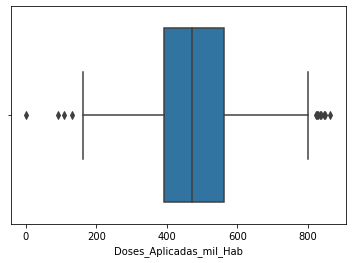

In [53]:
sns.boxplot(df_saude[filter]['Doses_Aplicadas_mil_Hab'])

print('novo boxplot desconsiderando dados filtrados:')

- Densidade_demográfica:

número de registros desconsiderando os filtrados: 560


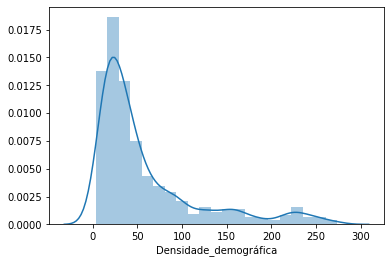

In [60]:
filter = df_saude['Densidade_demográfica'] < 281.44
sns.distplot(df_saude[filter]['Densidade_demográfica'])

print('número de registros desconsiderando os filtrados:',df_saude[filter]['Densidade_demográfica'].shape[0])

novo boxplot desconsiderando dados filtrados:


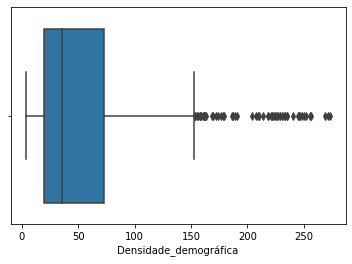

In [55]:
sns.boxplot(df_saude[filter]['Densidade_demográfica'])

print('novo boxplot desconsiderando dados filtrados:')

Observamos que Densidade_demográfica tem o maior número de outliers, e inclusive os valores mais extremos, por esse motivo supomos que fosse um bom ponto te partida na hora de separar nossos dados.

Vamos gerar um novo dataset com apenas outliers e outro sem os outliers e analisá-los por um momento:

In [56]:
filter = df_saude['Densidade_demográfica'] > 281.44
df_saude_out = df_saude[filter]
df_saude_out.describe()

,Mortalidade_infantil,IDHM_Educacao,Densidade_demográfica,Renda_per_capita,Grau_de_Urbanizacao,Indice_de_Gini,Esgoto_Sanitario,Estab_por_mil_Hab,Doses_Aplicadas_mil_Hab,Razao_Medico_mil_Hab
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,11.074235,0.720435,2197.942000,771.611412,97.858706,0.498365,83.500706,1.519748,527.909579,2.153623
std,4.658515,0.036770,3097.453914,244.301461,3.483498,0.056822,18.240725,1.124277,166.686955,1.449198
min,5.910000,0.646000,293.270000,355.020000,75.830000,0.371000,32.660000,0.264444,108.781760,0.241523
25%,8.370000,0.699000,445.800000,583.610000,97.630000,0.461000,77.970000,0.676263,427.754030,1.118956
50%,9.950000,0.718000,914.800000,730.230000,98.990000,0.494000,90.360000,1.136332,515.542348,1.778324
75%,12.530000,0.747000,2178.000000,881.160000,100.000000,0.543000,97.010000,2.231414,604.683845,2.695750
max,38.460000,0.825000,14207.570000,1578.740000,100.000000,0.686000,99.850000,4.598741,1065.544806,6.059231


In [57]:
filter = df_saude['Densidade_demográfica'] <= 281.44
df_saude_clean = df_saude[filter]
df_saude_clean.describe()

,Mortalidade_infantil,IDHM_Educacao,Densidade_demográfica,Renda_per_capita,Grau_de_Urbanizacao,Indice_de_Gini,Esgoto_Sanitario,Estab_por_mil_Hab,Doses_Aplicadas_mil_Hab,Razao_Medico_mil_Hab
count,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000
mean,20.992696,0.669643,58.839821,575.801304,85.241696,0.452589,91.624107,1.635169,494.676650,1.172434
std,18.390473,0.046411,59.651790,114.462576,13.524200,0.054924,13.997367,0.965861,160.996133,0.949101
min,2.740000,0.520000,3.660000,205.840000,25.890000,0.334000,7.370000,0.180571,0.000000,0.054215
25%,10.282500,0.638000,19.712500,500.822500,81.347500,0.413000,91.895000,0.957860,390.816469,0.568760
50%,15.250000,0.673000,35.650000,575.795000,89.135000,0.449500,97.140000,1.359125,473.648856,0.958135
75%,25.080000,0.701250,73.070000,647.045000,94.112500,0.489000,98.850000,2.067636,571.616908,1.480645
max,166.670000,0.782000,273.660000,1014.470000,100.000000,0.676000,100.000000,6.872028,1244.536941,8.622950


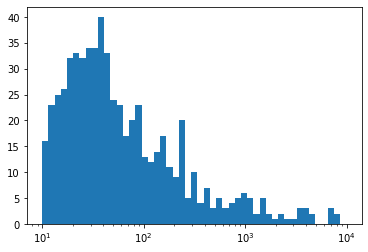

In [68]:
plt.hist(df_saude['Densidade_demográfica'], bins=np.logspace(np.log10(10),np.log10(10000)))
plt.gca().set_xscale("log")
plt.show()

# Infraestrutura, Urbanização e demografia. Normalizado em z-score

In [0]:
from scipy.stats import zscore

columns = ['Grau_de_Urbanizacao','Abastecimento_de_Agua','Coleta_de_Lixo','Esgoto_Sanitario ','Densidade_demográfica','Renda_per_capita']
df_infra = df_raw[columns]

df_infra = df_infra.apply(zscore) 
df_infra['IDHM'] = df_raw['IDHM']

KeyError: ignored

In [0]:
df_infra.head()

In [0]:
plt.figure(figsize=(10,8))
sns.heatmap(df_infra.corr(), annot=True)

# New Section

In [0]:
from sklearn.metrics import silhouette_score

silhouette_list = []
k_list = range(2, 20)

for p in k_list:
    clusterer = AgglomerativeClustering(n_clusters=p, linkage="average")
    clusterer.fit(train_pop)
    s = round(silhouette_score(train_pop, clusterer.labels_), 4)
    silhouette_list.append(s)
    print("silhouette_score =", s, " for k=", p)

key = silhouette_list.index(max(silhouette_list))
k = k_list.__getitem__(key)

print("Best=", max(silhouette_list), " for k=", k)

In [0]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as pl
import seaborn as sns

model = AgglomerativeClustering(n_clusters=6)
model.fit(train_pop)

pl.scatter(train_pop['Abastecimento_de_Agua'], train_pop['Coleta_de_Lixo'], c = model.labels_)

KMEANS

In [0]:
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sns

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")


from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

model = KMeans(n_clusters=6)
model.fit(train_pop)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
for i in range(3):
    print("\n Cluster %d:" % i),
    for ind in order_centroids[i, :100]:
        print(train_pop.iloc[ind].tolist())#('   %s' % terms[ind]),
    print


pl.scatter(train_pop.Abastecimento_de_Agua, train_pop.Coleta_de_Lixo, c = model.labels_)

In [0]:
Nc = range(2, 15)
kmeans_list = [KMeans(n_clusters=i) for i in Nc]
#print(kmeans_list)
score = [kmeans_list[i].fit(train).score(train) for i in range(len(kmeans_list))]
score
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [0]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=2)
model = model.fit(train[:100])
children = model.children_
#print(model.labels_)
#print(children)

distance = np.arange(children.shape[0])
#print(distance)
no_of_observations = np.arange(2, children.shape[0]+2)
#print(no_of_observations)
linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)
#print(linkage_matrix)

plt.figure(figsize=(35, 15))
dendrogram(linkage_matrix, labels=model.labels_)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

In [0]:
corrmat = train.corr() 
  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

In [0]:
#https://www.geeksforgeeks.org/exploring-correlation-in-python/
corrmat = train.corr()
#sns.figure(figsize=(100,35))
cg = sns.clustermap(corrmat, cmap ="YlGnBu", linewidths = 0.1);#annot=True 
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0) 
cg 

In [0]:
train.describe()

In [0]:
'''from pandas.plotting import scatter_matrix
scatter_matrix(train, alpha=0.2, figsize=(50, 50), diagonal='kde')'''

In [0]:
from scipy.stats import zscore

temp_list = []

for column in train:
  if df_raw[column].mean()>=1:
    temp_list.append(column)

In [0]:
temp_list.remove('IDHM_Ranking')
train_zscore =  train[temp_list]
train_zscore = train_zscore.apply(zscore)

In [0]:
train_zscore.head(20)

In [0]:
model = KMeans(n_clusters=2)
model.fit(train_zscore)

pl.scatter(train_zscore.Abastecimento_de_Agua, train_zscore.Populacao, c = model.labels_)

NameError: ignored

In [0]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12), metric='calinski_harabaz', timings=False)

visualizer.fit(train_zscore)        
    

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


NameError: ignored

In [0]:
#https://www.geeksforgeeks.org/exploring-correlation-in-python/
'''train.drop(['Criancas', 'Populacao_Masculina', 'Jovens', 'IDHM_Ranking'], axis=1, inplace=True)

corrmat = train.corr()
sns.clustermap(corrmat, cmap ="YlGnBu", linewidths = 0.01) '''

In [0]:
train.head()

NameError: ignored

In [0]:
train.to_csv('/content/sample_data/municipios_data.csv', index=False)

NameError: ignored

In [0]:
corrmat = train.corr() 
  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

In [0]:
#https://www.geeksforgeeks.org/exploring-correlation-in-python/
corrmat = train.corr()
#sns.figure(figsize=(100,35))
cg = sns.clustermap(corrmat, cmap ="YlGnBu", linewidths = 0.1);#annot=True 
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0) 
cg 

In [0]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=2)
model = model.fit(train[:100])
children = model.children_
#print(model.labels_)
#print(children)

distance = np.arange(children.shape[0])
#print(distance)
no_of_observations = np.arange(2, children.shape[0]+2)
#print(no_of_observations)
linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)
#print(linkage_matrix)

plt.figure(figsize=(35, 15))
dendrogram(linkage_matrix, labels=model.labels_)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

NameError: ignored

In [0]:
plt.hist(train['Populacao_Feminina'])